In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
movies = pd.read_csv("data/movies.csv", names=['movieId','title','genre'])
ratings = pd.read_csv(    "data/ratings.csv", names=['userId','movieId','rating','timestamp'])
users = pd.read_csv("data/users.csv", names=['userId','gender','age','occupation','zip-code'])

In [32]:
movies.head()

,movieId,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [34]:
users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [35]:
print("Movies:", movies.shape)
print("Ratings:", ratings.shape)
print("Users:", users.shape)

print("\nUnique Users:", ratings['userId'].nunique())
print("Unique Movies:", ratings['movieId'].nunique())

Movies: (3883, 3)
Ratings: (1000209, 4)
Users: (6040, 5)

Unique Users: 6040
Unique Movies: 3706


In [36]:
data = ratings.merge(users, on="userId").merge(movies, on="movieId")

print(data.head())

   userId  movieId  rating  timestamp gender  age  occupation zip-code  \
0       1     1193       5  978300760      F    1          10    48067   
1       1      661       3  978302109      F    1          10    48067   
2       1      914       3  978301968      F    1          10    48067   
3       1     3408       4  978300275      F    1          10    48067   
4       1     2355       5  978824291      F    1          10    48067   

                                    title                         genre  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy  


In [37]:
## Visualization

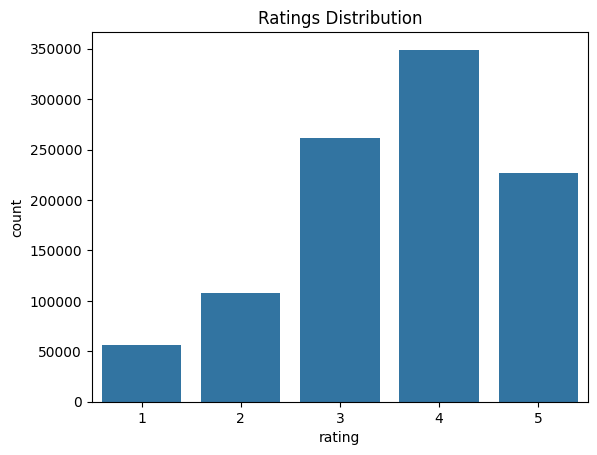

In [38]:
sns.countplot(x="rating", data=ratings)
plt.title("Ratings Distribution")
plt.show()

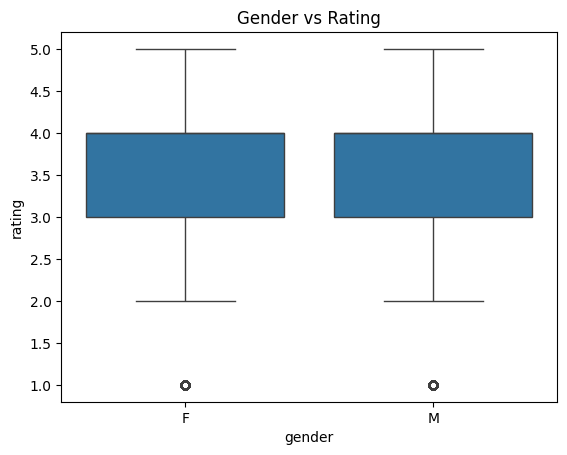

In [39]:
sns.boxplot(x="gender", y="rating", data=data)
plt.title("Gender vs Rating")
plt.show()

In [40]:
age_rating = data.groupby("age")["rating"].mean()
print(age_rating)

age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64


In [41]:
movie_stats = data.groupby("title")["rating"].agg(['count','mean'])
popular_movies = movie_stats.sort_values("count", ascending=False).head(10)
print(popular_movies)

                                                    count      mean
title                                                              
American Beauty (1999)                               3428  4.317386
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Star Wars: Episode V - The Empire Strikes Back ...   2990  4.292977
Star Wars: Episode VI - Return of the Jedi (1983)    2883  4.022893
Jurassic Park (1993)                                 2672  3.763847
Saving Private Ryan (1998)                           2653  4.337354
Terminator 2: Judgment Day (1991)                    2649  4.058513
Matrix, The (1999)                                   2590  4.315830
Back to the Future (1985)                            2583  3.990321
Silence of the Lambs, The (1991)                     2578  4.351823


In [49]:
all_genres = set()

for genres in movies['genre']:
    for g in genres.split('|'):
        all_genres.add(g)

all_genres = sorted(list(all_genres))

print("Total Genres:", len(all_genres))
print(all_genres)

Total Genres: 18
['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [50]:
for genre in all_genres:
    movies[genre] = movies['genre'].apply(lambda x: 1 if genre in x.split('|') else 0)

movies.head()

,movieId,title,genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
users_encoded = pd.get_dummies(users, columns=['occupation','gender'],dtype=int)
users_encoded.head()

,userId,age,zip-code,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,...,occupation_13,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,gender_F,gender_M
0,1,1,48067,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,56,70072,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,25,55117,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,4,45,02460,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,25,55455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [53]:
data = ratings.merge(users_encoded, on='userId').merge(movies, on='movieId')

In [54]:
data

,userId,movieId,rating,timestamp,age,zip-code,occupation_0,occupation_1,occupation_2,occupation_3,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,1,48067,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,1,48067,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,1,48067,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,1,48067,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,1,48067,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,25,11106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,5,956704887,25,11106,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1000206,6040,562,5,956704746,25,11106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,4,956715648,25,11106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
all_genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [58]:
movie_popularity = ratings.groupby('movieId')['rating'].mean().reset_index()
movie_popularity.columns = ['movieId','popularity_score']

movies = movies.merge(movie_popularity, on='movieId')

In [66]:
def hybrid_recommend(age, occupation, preferred_genres, top_n=10):
    
    # -------- Genre Score --------
    genre_vector = np.zeros(len(all_genres))
    
    for i, genre in enumerate(all_genres):
        if genre in preferred_genres:
            genre_vector[i] = 1
    
    movie_genre_matrix = movies[all_genres].values
    
    # cosine similarity manually
    genre_score = movie_genre_matrix.dot(genre_vector)
    
    # normalize
    genre_score = genre_score / (np.linalg.norm(movie_genre_matrix, axis=1) + 1e-8)
    
    
    # -------- Demographic Score --------
    similar_users = users[
        (users['age'] == age) &
        (users['occupation'] == occupation)
    ]['userId']
    
    demo_ratings = ratings[ratings['userId'].isin(similar_users)]
    
    demo_score = demo_ratings.groupby('movieId')['rating'].mean()
    
    movies['demo_score'] = movies['movieId'].map(demo_score)
    movies['demo_score'] = movies['demo_score'].fillna(0)
    
    
    # -------- Popularity Score --------
    pop_score = movies['popularity_score'].fillna(0)
    
    
    # -------- Final Weighted Score --------
    w1, w2, w3 = 0.4, 0.4, 0.2
    
    movies['final_score'] = (
        w1 * genre_score +
        w2 * movies['demo_score'] +
        w3 * pop_score
    )
    
    return movies.sort_values(
        'final_score',
        ascending=False
    )[["title","genre","final_score"]].head(top_n)

In [67]:

hybrid_recommend(25, 0, ['Action','Comedy'], top_n=10)

,title,genre,final_score
2729,"Palm Beach Story, The (1942)",Comedy,3.257692
2698,Sanjuro (1962),Action|Adventure,3.204582
2917,Go West (1925),Comedy,3.142857
3056,Different for Girls (1996),Comedy,3.140000
2924,"Three Ages, The (1923)",Comedy,3.088889
1975,"Best Man, The (Il Testimone dello sposo) (1997)",Comedy|Drama,3.038398
3262,Roadside Prophets (1992),Comedy|Drama,3.032843
876,Love in the Afternoon (1957),Comedy|Romance,3.032843
2049,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama,3.031296
1066,"Wrong Trousers, The (1993)",Animation|Comedy,3.016988
